In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## **EDA**

In [40]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [41]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [42]:
cat_cols=['Genre']
num_cols=['Age','Annual Income (k$)']
df[cat_cols]=df[cat_cols].astype('category')
df.dtypes

CustomerID                   int64
Genre                     category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [43]:
df = df.drop('CustomerID', axis=1)

## **visualizations**

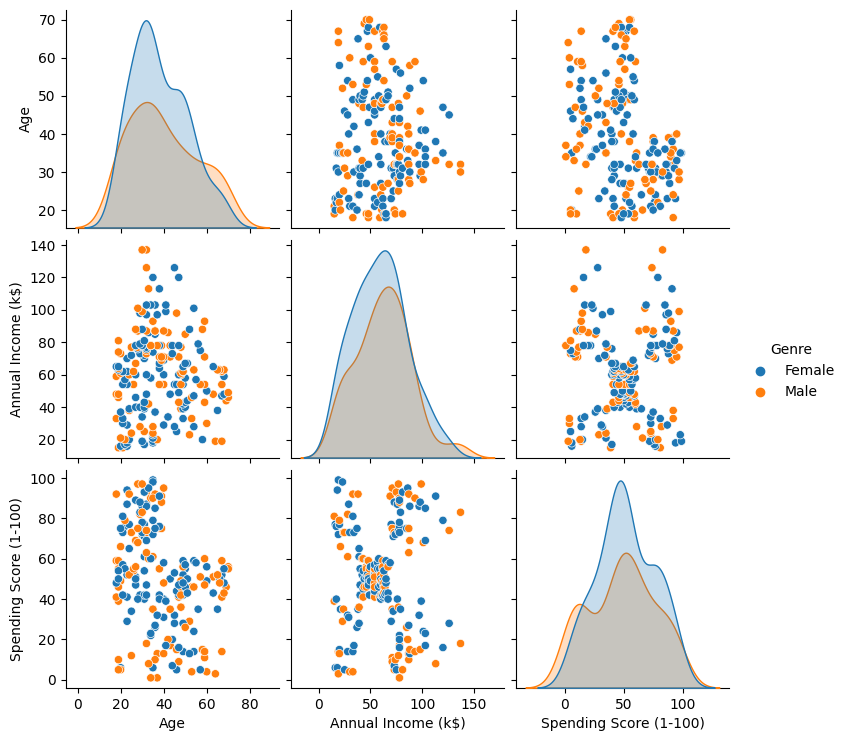

In [11]:
sns.pairplot(data=df, hue='Genre')

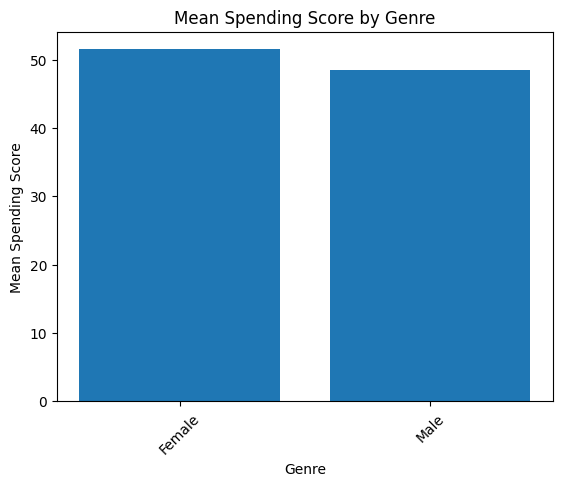

In [45]:

genre_spending = df.groupby('Genre')['Spending Score (1-100)'].mean()
highest_genre = genre_spending.idxmax()

plt.bar(genre_spending.index, genre_spending.values)
plt.xlabel('Genre')
plt.ylabel('Mean Spending Score')
plt.title('Mean Spending Score by Genre')
plt.xticks(rotation=45)
plt.show()

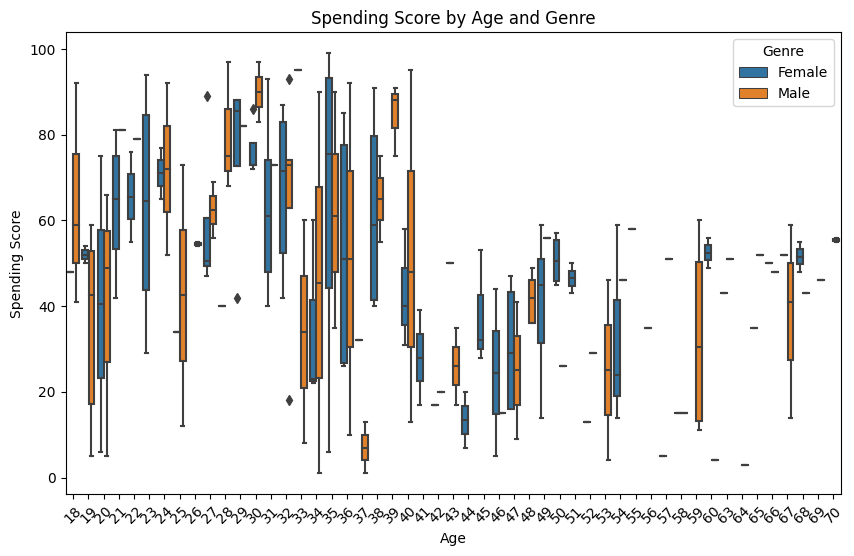

In [46]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre', ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_title('Spending Score by Age and Genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

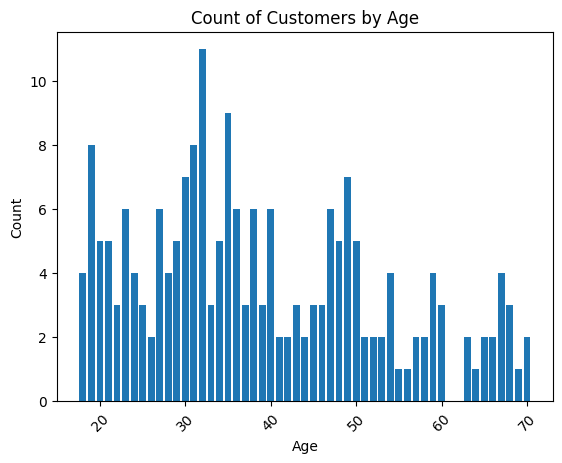

In [29]:
age_counts = df['Age'].value_counts()

plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Customers by Age')
plt.xticks(rotation=45)
plt.show()

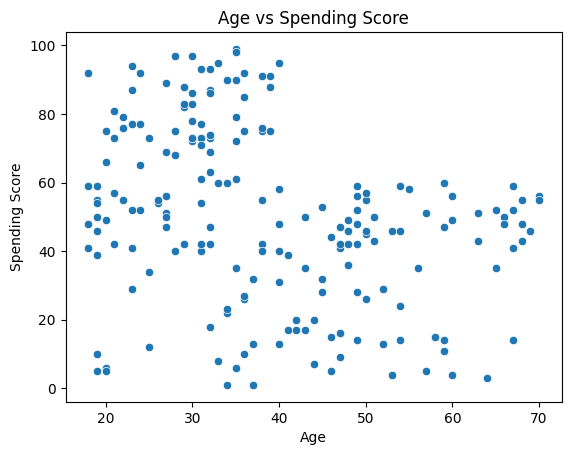

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()

## **Model Buidling**

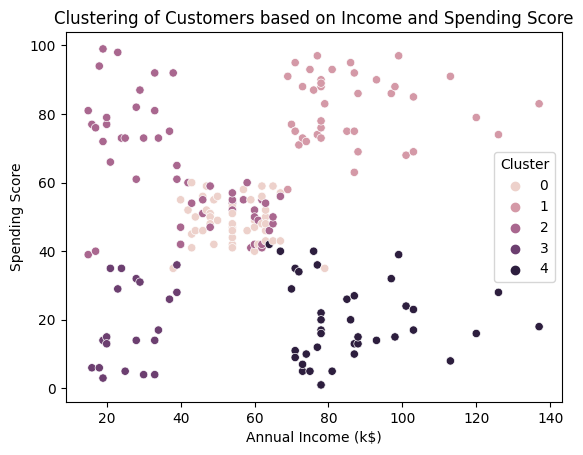

In [30]:
# Selecting the features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-means clustering
kmeans = KMeans(n_clusters=5,init="k-means++", random_state=42)
kmeans.fit(scaled_features)

# Adding the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Clustering of Customers based on Income and Spending Score')
plt.show()

In [47]:
X=df.drop(['Genre', 'Age'],axis=1)

In [48]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)


In [49]:
y=kmeans.fit_predict(X)

In [52]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [50]:
mall=df.copy()

In [53]:
mall['Claster']=y

In [54]:
mall.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100),Claster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

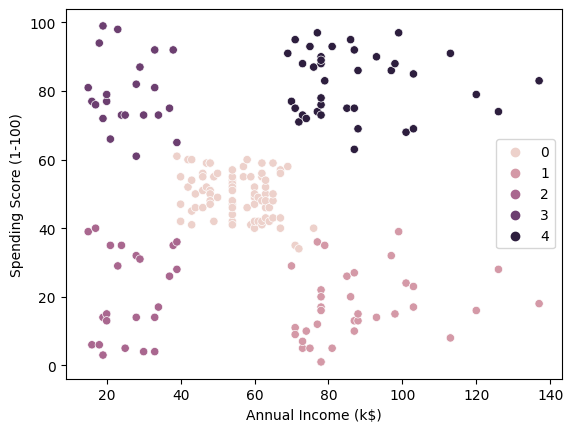

In [55]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=kmeans.labels_,data=mall)


## **Finding the Optimal Number of Clusters**

In [56]:
w=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    w.append(kmeans.inertia_)
w

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.4554479337,
 37233.81451071001,
 30259.65720728547,
 25011.839349156588,
 21862.092672182887,
 19672.07284901432,
 17887.084456628643,
 15917.60968942786]

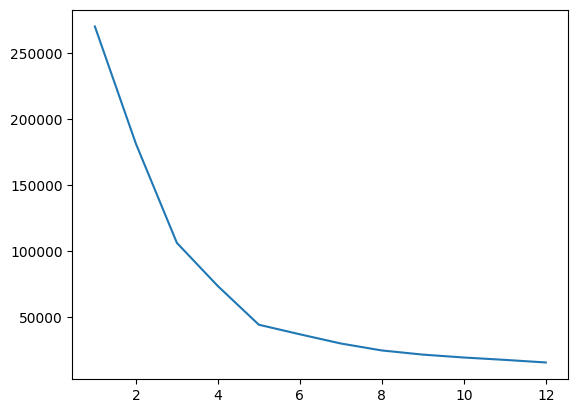

In [57]:
plt.plot(range(1,13),w)


In [59]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [60]:
HiCl = df.copy()

In [61]:
HiCl.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Text(0, 0.5, 'Euclidean distances')

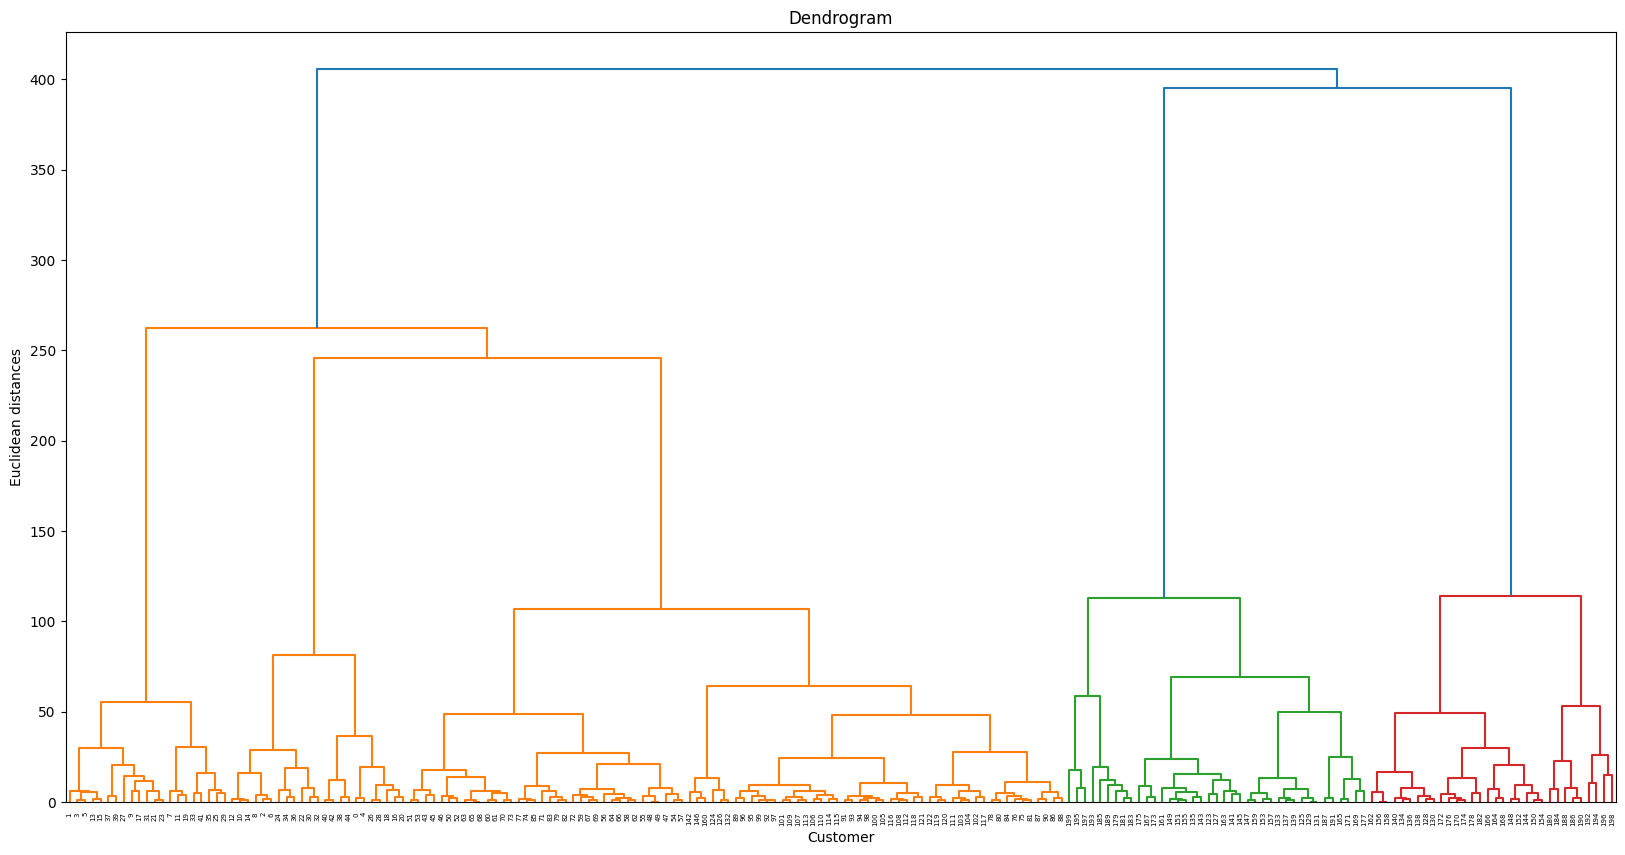

In [62]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distances")

In [64]:
clH=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
clH.fit(X)

AgglomerativeClustering(n_clusters=5)

In [65]:
yH=clH.fit_predict(X)
yH

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [66]:
HiCl['Claster']=yH
HiCl.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Claster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

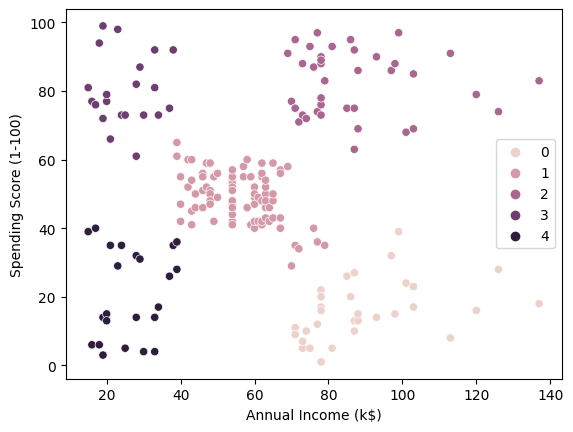

In [67]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=clH.labels_,data=HiCl)